In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io

from plotnine import *

**DATA SOURCE**


1.   https://ourworldindata.org/
2.   https://data.worldbank.org/
3.   https://statisticstimes.com/



##**Linear Regression: GGDP = GINI - GINI^2 - HDI - AVERAGE INCOME - POPULATION**

In [ ]:
#DENMARK
import statsmodels.api as sm
#Project 2
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["dung_data.csv"]))
gini=data.GINI
hdi=data.HDI
loghdi=np.log(hdi)
income=data.Income
logincome = np.log(income)
pop=data.Population
logpop = np.log(pop)
gdp=data.GDP
X = np.column_stack((gini,gini**2,loghdi,logincome,logpop))
X = sm.add_constant(X)
model1 = sm.OLS(gdp,X)
reg1 = model1.fit()
print(reg1.summary())

In [ ]:
#RUSSIA
import statsmodels.api as sm
#Project 2
uploaded = files.upload()
data = pd.read_excel(io.BytesIO(uploaded["russia_gGDP_GINI.xlsx"]))
gini=data.GINI
hdi=data.HDI
income=data.Income
logincome = np.log(income)
pop=data.Population
logpop = np.log(pop)
X = np.column_stack((gini,gini**2,hdi,logincome,logpop))
X = sm.add_constant(X)
gdp=data.GDP
model1 = sm.OLS(gdp,X)
reg1 = model1.fit()
print(reg1.summary())

In [ ]:
#BURUNDI
import statsmodels.api as sm
#Project 2
uploaded = files.upload()
data = pd.read_excel(io.BytesIO(uploaded["burundi_gGDP_GINI.xlsx"]))
gini=data.GINI
hdi=data.HDI
income=data.Income
logincome = np.log(income)
pop=data.Population
logpop = np.log(pop)
X = np.column_stack((gini,gini**2,hdi,logincome,logpop))
X = sm.add_constant(X)
gdp=data.GDP
model1 = sm.OLS(gdp,X)
reg1 = model1.fit()
print(reg1.summary())

In [ ]:
#INDONESIA
import statsmodels.api as sm
#Project 2
uploaded = files.upload()
data = pd.read_excel(io.BytesIO(uploaded["Indonesia_gGDP_GINI.xlsx"]))
gini=data.GINI
hdi=data.HDI
income=data.INCOME
logincome = np.log(income)
pop=data.Population
logpop = np.log(pop)
X = np.column_stack((gini,gini**2,hdi,logincome,logpop))
X = sm.add_constant(X)
gdp=data.GDP
model1 = sm.OLS(gdp,X)
reg1 = model1.fit()
print(reg1.summary())

Saving Indonesia_gGDP_GINI.xlsx to Indonesia_gGDP_GINI.xlsx
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     4.366
Date:                Sun, 19 Dec 2021   Prob (F-statistic):             0.0121
Time:                        08:28:15   Log-Likelihood:                -57.215
No. Observations:                  23   AIC:                             124.4
Df Residuals:                      18   BIC:                             130.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

##**GDP Per Capita**
Source: World Bank

In [ ]:
#upload file
uploaded = files.upload()
GDP = pd.read_csv(io.BytesIO(uploaded["GDP.csv"]), na_values = "***")

Saving GDP.csv to GDP.csv


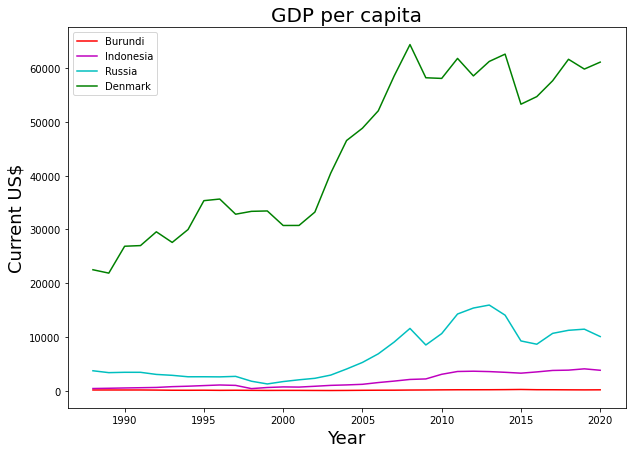

In [ ]:
#Draw line graph
fig = plt.figure(figsize=(10,7))
plt.plot(GDP['Time'], GDP['Burundi [BDI]'], label = 'Burundi', color ='r')
plt.plot(GDP['Time'], GDP['Indonesia [IDN]'], label = 'Indonesia', color='m') 
plt.plot(GDP['Time'], GDP['Russian Federation [RUS]'], label = 'Russia', color ='c')
plt.plot(GDP['Time'], GDP['Denmark [DNK]'], label = 'Denmark', color='g') 
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Current US$', fontsize = 18)
plt.title('GDP per capita', fontsize = 20)
plt.legend()

##**GDP Growth**

In [ ]:
#up file
uploaded = files.upload()
GGDP = pd.read_csv(io.BytesIO(uploaded["GGDP.csv"]),sep=',')

Saving GGDP.csv to GGDP.csv


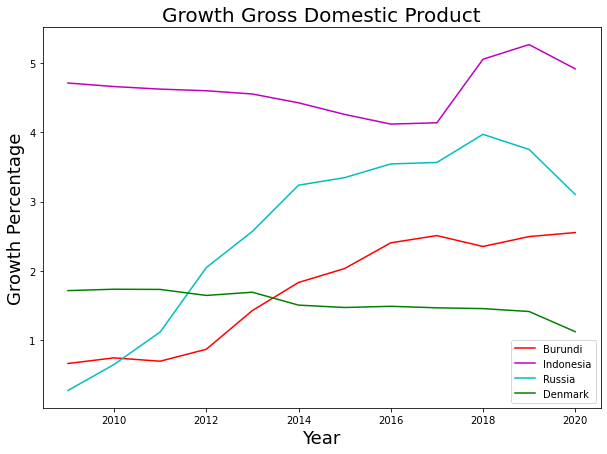

In [ ]:
#Draw line graph
fig = plt.figure(figsize=(10,7))
plt.plot(GGDP['Time'], GGDP['Burundi [BDI]'].rolling(window = 20).mean(), label = 'Burundi', color ='r')
plt.plot(GGDP['Time'], GGDP['Indonesia [IDN]'].rolling(window = 20).mean(), label = 'Indonesia', color='m') 
plt.plot(GGDP['Time'], GGDP['Russian Federation [RUS]'].rolling(window = 20).mean(), label = 'Russia', color ='c')
plt.plot(GGDP['Time'], GGDP['Denmark [DNK]'].rolling(window = 20).mean(), label = 'Denmark', color='g') 
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Growth Percentage', fontsize = 18)
plt.title('Growth Gross Domestic Product', fontsize = 20)
plt.legend()

##**Lorenz curve**

In [ ]:
#up file
uploaded = files.upload()
decile_data = pd.read_csv(io.BytesIO(uploaded["dung_data.csv"]))

Saving GCIPrawdata.xlsx to GCIPrawdata.xlsx


In [ ]:
#Choose year & country
year=decile_data[(decile_data.Year==2014)]
temp=year[(year.Country=='Russian Federation') | (year.Country=='Denmark')|(year.Country=='Burundi')|(year.Country=='Indonesia')]
temp["total_income"] = temp["Mean Income"] * temp["Population"]
temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population,total_income
682,Burundi,2014,46,68,92,120,153,194,248,327,472,1630,335,10816860,3623648100
1234,Denmark,2014,4818,7480,9276,10736,12077,13437,14967,16934,20110,34411,14425,5639565,81350725125
2022,Indonesia,2014,281,451,632,832,1061,1336,1690,2201,3110,7963,1956,254500000,497802000000
3657,Russian Federation,2014,1781,2880,3740,4496,5226,5991,6872,8021,9886,16818,6571,143800000,944909800000


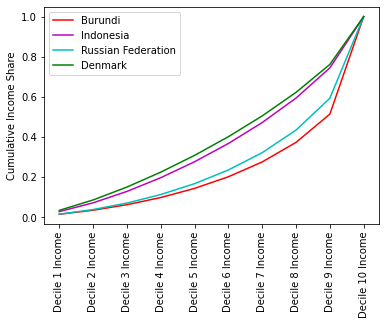

In [ ]:
#Calculate cumulative income share
decs_burundi = temp.iloc[0, 2:12]
decs_denmark = temp.iloc[1, 2:12]
decs_russia = temp.iloc[2, 2:12]
decs_southafrica = temp.iloc[3, 2:12]

cum_inc_share_burundi = decs_burundi.cumsum() / (10 * temp.iloc[0]["Mean Income"])
cum_inc_share_denmark = decs_denmark.cumsum() / (10 * temp.iloc[1]["Mean Income"])
cum_inc_share_russia = decs_russia.cumsum() / (10 * temp.iloc[2]["Mean Income"])
cum_inc_share_southafrica = decs_southafrica.cumsum() / (10 * temp.iloc[3]["Mean Income"])
#Draw Lorenz curve
plt.xticks(rotation=90)
plt.plot(cum_inc_share_burundi,color='r',label='Burundi')
plt.plot(cum_inc_share_southafrica,color='m',label='Indonesia')
plt.plot(cum_inc_share_russia,color='c',label='Russian Federation')
plt.plot(cum_inc_share_denmark,color='g',label='Denmark')
plt.ylabel('Cumulative Income Share')
plt.legend()